In [84]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

In [85]:
# start = datetime(2020, 1, 1)
# end = datetime.now()
# df = pdr.get_data_yahoo('TSLA', start, end)
# print(df.head())

In [86]:
import yfinance as yf

df = yf.download("TSLA", start="2020-01-01")
df = pd.DataFrame(df)



[*********************100%***********************]  1 of 1 completed


In [87]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500


In [88]:
# Fix MultiIndex leftovers
df.columns = df.columns.droplevel(1)
df.columns.name = None

In [89]:
df.reset_index(inplace=True)


In [90]:
print(df.head())

        Date      Close       High        Low       Open     Volume
0 2020-01-02  28.684000  28.713333  28.114000  28.299999  142981500
1 2020-01-03  29.534000  30.266666  29.128000  29.366667  266677500
2 2020-01-06  30.102667  30.104000  29.333332  29.364668  151995000
3 2020-01-07  31.270666  31.441999  30.224001  30.760000  268231500
4 2020-01-08  32.809334  33.232666  31.215334  31.580000  467164500


In [91]:
df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [92]:
df['Date'] = pd.to_datetime(df['Date'])


In [121]:
print(df.head())
indexed_df = df.set_index('Date', drop=True)
print(indexed_df.head())


        Date      Close       High        Low       Open     Volume
0 2020-01-02  28.684000  28.713333  28.114000  28.299999  142981500
1 2020-01-03  29.534000  30.266666  29.128000  29.366667  266677500
2 2020-01-06  30.102667  30.104000  29.333332  29.364668  151995000
3 2020-01-07  31.270666  31.441999  30.224001  30.760000  268231500
4 2020-01-08  32.809334  33.232666  31.215334  31.580000  467164500
                Close       High        Low       Open     Volume
Date                                                             
2020-01-02  28.684000  28.713333  28.114000  28.299999  142981500
2020-01-03  29.534000  30.266666  29.128000  29.366667  266677500
2020-01-06  30.102667  30.104000  29.333332  29.364668  151995000
2020-01-07  31.270666  31.441999  30.224001  30.760000  268231500
2020-01-08  32.809334  33.232666  31.215334  31.580000  467164500


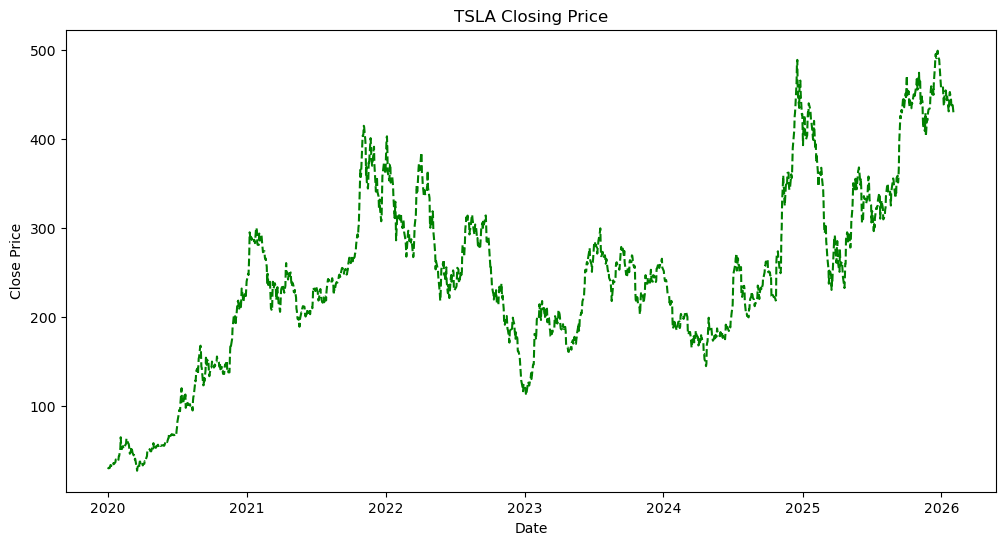

In [ ]:
#df.plot()
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['High'], c='green', ls='--')
# plt.plot(indexed_df.index, indexed_df['High'], c='green', ls='--')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("TSLA Closing Price")
plt.show()


In [102]:
df.index

RangeIndex(start=0, stop=1529, step=1)

In [103]:
df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [109]:
index = indexed_df.loc['2020-01-01':'2021-09-01'].index
shared_open = indexed_df.loc['2020-01-01':'2021-09-01']['Open']
shared_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2021-08-26    236.103333
2021-08-27    235.000000
2021-08-30    238.240005
2021-08-31    244.333328
2021-09-01    244.693329
Name: Open, Length: 421, dtype: float64

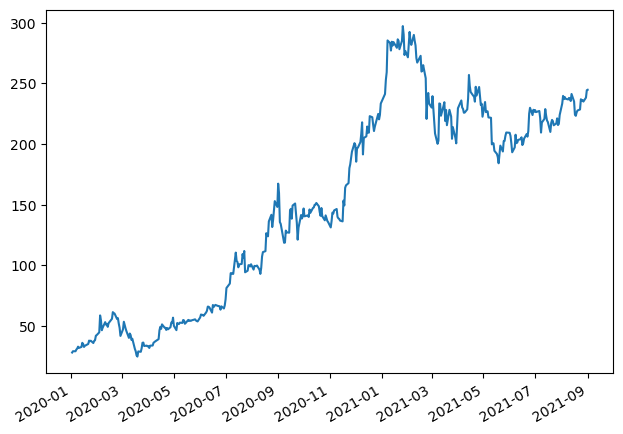

In [112]:
figure, axis = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index,shared_open)

In [118]:
### datetime index
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1529 non-null   datetime64[ns]
 1   Close   1529 non-null   float64       
 2   High    1529 non-null   float64       
 3   Low     1529 non-null   float64       
 4   Open    1529 non-null   float64       
 5   Volume  1529 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.8 KB


### Time Resampling

In [ ]:
# To get the minimum values of that date
indexed_df.resample(rule='A').min()
#a means year end frequency
#

C:\Users\108207\AppData\Local\Temp\ipykernel_19404\167862867.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  indexed_df.resample(rule='A').min()


,Close,High,Low,Open,Volume
Date,,,,,
2020-12-31,24.081333,26.990667,23.367332,24.980000,52073100
2021-12-31,187.666672,188.736664,179.830002,184.183334,29401800
2022-12-31,109.099998,116.269997,108.239998,110.349998,41864700
2023-12-31,108.099998,111.750000,101.809998,103.000000,65125200
2024-12-31,142.050003,144.440002,138.800003,140.559998,37167600
2025-12-31,221.860001,230.100006,214.250000,223.779999,36252900
2026-12-31,416.559998,427.149994,414.500000,421.290009,37733100


C:\Users\108207\AppData\Local\Temp\ipykernel_19404\4257210539.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  indexed_df.resample(rule='A').min()
C:\Users\108207\AppData\Local\Temp\ipykernel_19404\4257210539.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  indexed_df.resample(rule='A').min()['High'].plot()


<Axes: xlabel='Date'>

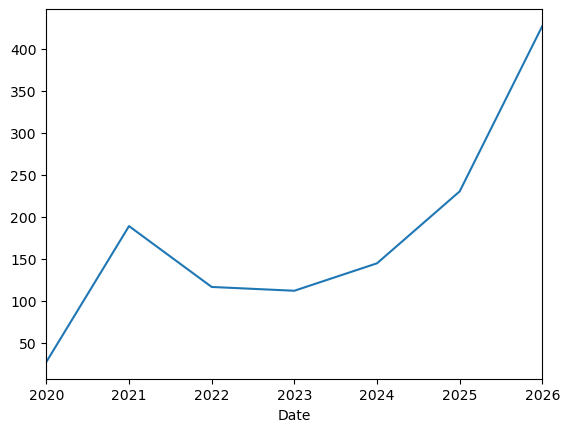

In [ ]:
indexed_df.resample(rule='A').min()['High'].plot()

C:\Users\108207\AppData\Local\Temp\ipykernel_19404\4054512335.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  indexed_df.resample(rule='A').max()['High'].plot()


<Axes: xlabel='Date'>

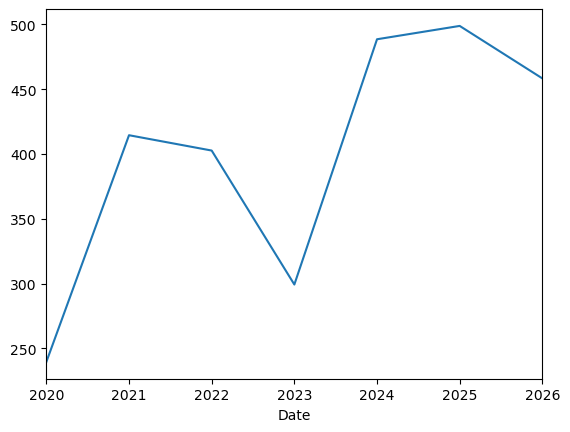

In [128]:
indexed_df.resample(rule='A').max()['High'].plot()

### quarterly start frequency

<Axes: xlabel='Date'>

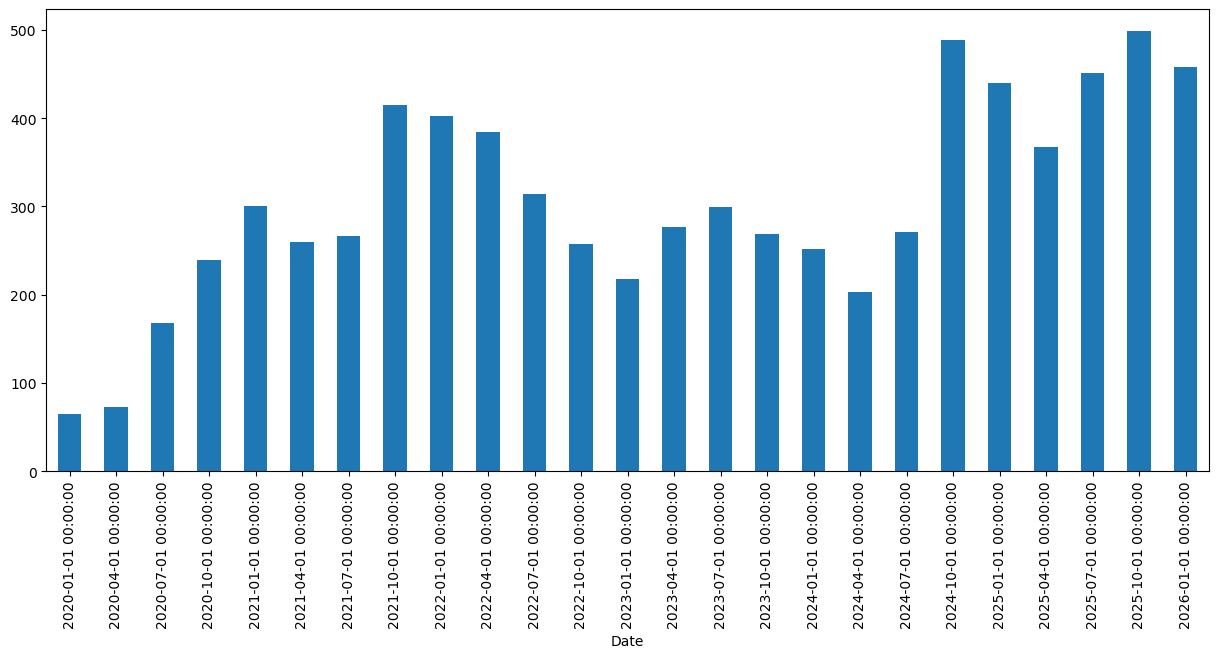

In [133]:
indexed_df.resample(rule='QS').max()['High'].plot(kind='bar', figsize=(15,6))

### Business end frequency

C:\Users\108207\AppData\Local\Temp\ipykernel_19404\948461564.py:1: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  indexed_df.resample(rule='BA').max()['High'].plot()


<Axes: xlabel='Date'>

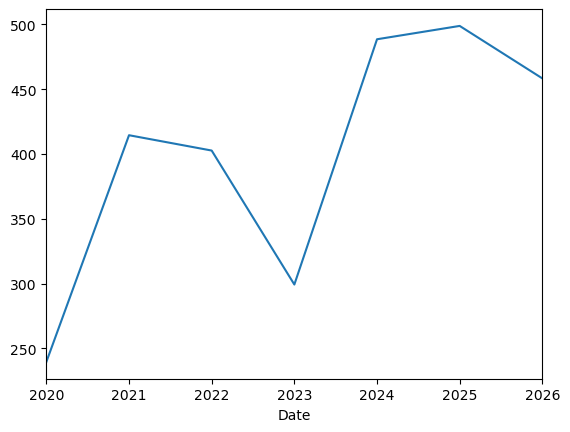

In [131]:
indexed_df.resample(rule='BA').max()['High'].plot()

### Rolling and expanding


In [136]:
indexed_df['High'].rolling(10).mean().head(20)

Date
2020-01-02          NaN
2020-01-03          NaN
2020-01-06          NaN
2020-01-07          NaN
2020-01-08          NaN
2020-01-09          NaN
2020-01-10          NaN
2020-01-13          NaN
2020-01-14          NaN
2020-01-15    32.673333
2020-01-16    33.231733
2020-01-17    33.642866
2020-01-21    34.289666
2020-01-22    35.108799
2020-01-23    35.665533
2020-01-24    36.165932
2020-01-27    36.695932
2020-01-28    37.037132
2020-01-29    37.319732
2020-01-30    38.073332
Name: High, dtype: float64

In [143]:
indexed_df['Open: 30 days Rolling'] = indexed_df['Open'].rolling(30).mean()

In [144]:
indexed_df.head(40)

,Close,High,Low,Open,Volume,Open: 30 days Rolling
Date,,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500,NaN
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500,NaN
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000,NaN
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500,NaN
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500,NaN
2020-01-09,32.089333,33.253334,31.524668,33.139999,426606000,NaN
2020-01-10,31.876667,32.329334,31.580000,32.119331,194392500,NaN
2020-01-13,34.990665,35.042000,32.799999,32.900002,397764000,NaN
2020-01-14,35.861332,36.493999,34.993332,36.284000,434943000,NaN


<Axes: xlabel='Date'>

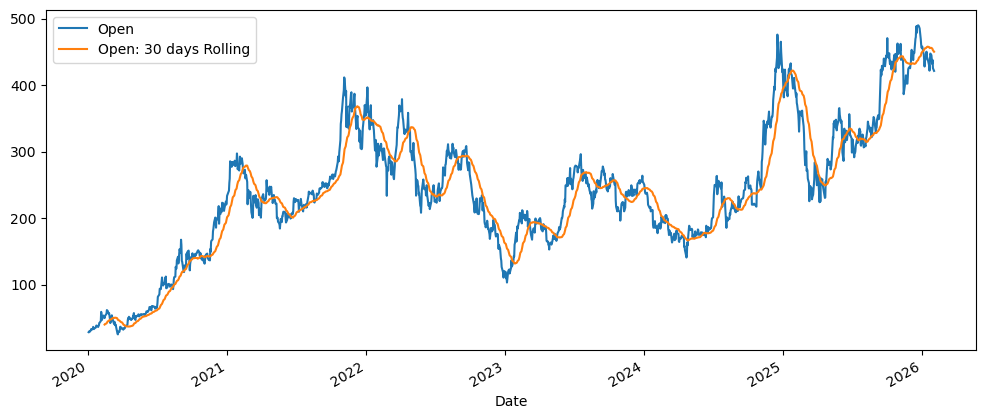

In [146]:
indexed_df[['Open', 'Open: 30 days Rolling']].plot(figsize=(12,5))

In [ ]:
### Assignment
# Read the microsoft data using Pandas Data reader
# Get the maximum price of the share from 2017-2022
# Which is the date of the highest price of the stock?
# Which is the date of the lowest price of the stock?